In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ships-in-satellite-imagery/shipsnet.json
/kaggle/input/ships-in-satellite-imagery/shipsnet/shipsnet/1__20170705_180816_103e__-122.32658408124291_37.706907776737474.png
/kaggle/input/ships-in-satellite-imagery/shipsnet/shipsnet/0__20171023_190147_0f2e__-122.44931218477075_37.74813135712905.png
/kaggle/input/ships-in-satellite-imagery/shipsnet/shipsnet/0__20170917_190616_0f3c__-122.41281471377471_37.81179510079203.png
/kaggle/input/ships-in-satellite-imagery/shipsnet/shipsnet/1__20170709_181333_0e0e__-122.36013529353468_37.77093483120248.png
/kaggle/input/ships-in-satellite-imagery/shipsnet/shipsnet/0__20161116_180802_0e14__-122.49999218351591_37.88828552016498.png
/kaggle/input/ships-in-satellite-imagery/shipsnet/shipsnet/0__20180710_182341_1011__-122.08261432972722_37.73854704083466.png
/kaggle/input/ships-in-satellite-imagery/shipsnet/shipsnet/1__20180708_182358_1032__-122.34681533273329_37.759451149806985.png
/kaggle/input/ships-in-satellite-imagery/shipsnet/shipsnet/0_

In [2]:
# common imports

import numpy as np
import json
import matplotlib.pyplot as plt


In [3]:
file = open('../input/ships-in-satellite-imagery/shipsnet.json')
dataset = json.load(file)
file.close()

In [4]:
dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [5]:
# write data to numpy arrays
data = np.array(dataset['data']).astype('uint8')

In [6]:
data.shape

(4000, 19200)

In [7]:
# extract label data 

label_data = np.array(dataset['labels']).astype('uint8')

In [8]:
label_data.shape

(4000,)

In [9]:
# reshape data
channels = 3
width = 80
height = 80

X = data.reshape(-1, 3, width, height).transpose([0,2,3,1])
X.shape

(4000, 80, 80, 3)

### Sample Image

(80, 80, 3)


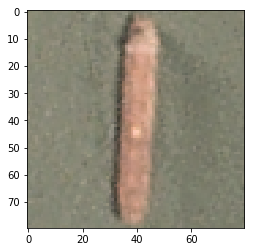

In [10]:
# check sample shape and plot
print(X[800].shape)
sample_pic = X[800]
plt.imshow(X[800])

In [11]:
type(sample_pic)

numpy.ndarray

### SKImage 

Convert RGB image to Grayscale

In [12]:
from skimage import color

In [13]:
sample_pic_gr = color.rgb2gray(sample_pic)

In [14]:
sample_pic_gr.shape

(80, 80)

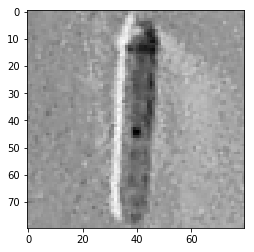

In [15]:
plt.imshow(sample_pic_gr)
plt.set_cmap('Greys')

In [16]:
# converting all images to greyscale. Output is a list

X_grey = [ color.rgb2gray(i) for i in X]

In [17]:
X_grey = np.array(X_grey)

In [18]:
X_grey.shape

(4000, 80, 80)

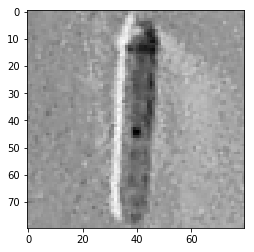

In [19]:
plt.imshow(X_grey[800])

In [20]:
label_data[800]


1

In [21]:
# Training data is a 3D matrix. Convert to a 2D matrix. 

X_grey = X_grey.reshape(len(X_grey), -1)

In [22]:
X_grey.shape

(4000, 6400)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_grey, label_data, test_size=0.2, random_state=42)

### SVC Classifier

In [24]:
# SVM Classifier 

# SVC with rbf kernel. Standard scaler

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


svc_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(gamma='scale'))
])

svc_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [25]:
svc_clf.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)>

In [26]:
from sklearn.metrics import classification_report,accuracy_score
y_pred = svc_clf.predict(X_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.94875


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       591
           1       0.93      0.87      0.90       209

    accuracy                           0.95       800
   macro avg       0.94      0.92      0.93       800
weighted avg       0.95      0.95      0.95       800



In [27]:
X_test

array([[0.24129373, 0.24521529, 0.24212706, ..., 0.28858275, 0.30006471,
        0.26980824],
       [0.44834549, 0.52171647, 0.54889961, ..., 0.64024941, 0.63297176,
        0.49234588],
       [0.29132078, 0.29132078, 0.32212   , ..., 0.28010667, 0.29243686,
        0.28178824],
       ...,
       [0.15783961, 0.16149333, 0.20519608, ..., 0.05884627, 0.08993608,
        0.15603725],
       [0.80416471, 0.78819569, 0.75345216, ..., 0.34622   , 0.51587333,
        0.64384078],
       [0.3745298 , 0.36473725, 0.35325529, ..., 0.36111333, 0.38324392,
        0.39472588]])

In [28]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

### Linear SVC

In [29]:
from sklearn.svm import LinearSVC

linearsvc_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(loss='hinge'))
])

linearsvc_clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [30]:
y_pred = linearsvc_clf.predict(X_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.83125


              precision    recall  f1-score   support

           0       0.94      0.83      0.88       591
           1       0.63      0.84      0.72       209

    accuracy                           0.83       800
   macro avg       0.78      0.83      0.80       800
weighted avg       0.86      0.83      0.84       800



### SGD Classifier

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_clf', SGDClassifier())
])

sgd_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgd_clf',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [32]:
y_pred = sgd_clf.predict(X_test)

print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.84375


              precision    recall  f1-score   support

           0       0.88      0.91      0.90       591
           1       0.72      0.66      0.69       209

    accuracy                           0.84       800
   macro avg       0.80      0.78      0.79       800
weighted avg       0.84      0.84      0.84       800



In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import scipy.spatial.distance
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [34]:
def get_hog(image):
    image = cv2.bilateralFilter(np.float32(image),5,75,75)/ 255.0
    gx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    histo, edges = np.histogram(angle, 36, weights=mag, range=(0,359))
    return histo, edges

# HOG DETECTION

In [35]:
hog_metric = scipy.spatial.distance.euclidean
def circular_hog_compair(hog1, hog2, ref_build=False):
    hog1, hog2 = list(hog1), list(hog2)
    distances = [hog_metric(hog1, hog2)]
    for i in range(1,len(hog1)):
        distances.append(hog_metric(hog1, hog2[-i:]+hog2[i:]))
    d = min(distances)
    
    if ref_build:
        k = distances.index(d)
        if k != 0:
            best_oriented = hog2[-k:]+hog2[k:]
        else:
            best_oriented = hog2
        return d, best_oriented 
    else:
        return d

In [36]:
hogs = []
distances = []
first = True
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        if filename[0] == '1' and first:
            path = os.path.join(dirname, filename)
            img = cv2.imread(path,0)
            h, ref_bins = get_hog(img)
            hogs = [h]
            first = False
        elif filename[0] == '1':
            path = os.path.join(dirname, filename)
            img = cv2.imread(path,0)
            h, _ = get_hog(img)
            d, h = circular_hog_compair(hogs[0], h, ref_build=True) 
            hogs.append(h)
            distances.append(d)
ref = np.mean(np.array(hogs), axis = 0)

# HOG AND SVM

In [37]:
X, y = [], []
for dirname, _, filenames in os.walk('/kaggle/input/ships-in-satellite-imagery/shipsnet/'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        img = cv2.imread(path,0)
        h, ref_bins = get_hog(img)
        X.append(h)
        y.append(int(filename[0]))
X = np.array(X)
y = np.array(y)
print(X.shape)

(4000, 36)


In [38]:
grid = {'kernel':['poly'], 'degree':[3],'C':[100]}
svc = SVC()
model = GridSearchCV(svc, grid)
model.fit(X, y)
print(model.best_params_,model.best_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in v

{'C': 100, 'degree': 3, 'kernel': 'poly'} 0.822


In [39]:
#Test results
def image_scanner_simple(image, ref_hog, treshold, stride=1):
    possible_pos = []
    h,w = image.shape
    for i in range(0,h-80-stride,stride):
        for j in range(0,w-80-stride, stride):
            h, _ = get_hog(image[i:i+80,j:j+80])
            d = circular_hog_compair(ref_hog, h)
            if d < treshold:
                possible_pos.append((i,j))
    return possible_pos

def image_scanner_SVM(image, model, stride=1):
    possible_pos = []
    h,w = image.shape
    for i in range(0,h-80-stride,stride):
        for j in range(0,w-80-stride, stride):
            h, _ = get_hog(image[i:i+80,j:j+80])
            d = model.predict(np.array(h).reshape((1,-1)))
            if d[0] == 1:
                possible_pos.append((i,j))
    return possible_pos

In [40]:
print(np.mean(distances), np.std(distances))

36.774036071441316 8.748067799627533


In [41]:
first_test = cv2.imread('../input/ships-in-satellite-imagery/scenes/scenes/lb_1.png',0)
xy = image_scanner_SVM(first_test, model.best_estimator_, stride=20)
len(xy)

321

In [42]:
h, _ = get_hog(first_test[120:200,180:260])
model.best_estimator_.predict(np.array(h).reshape((1,-1)))[0]

0

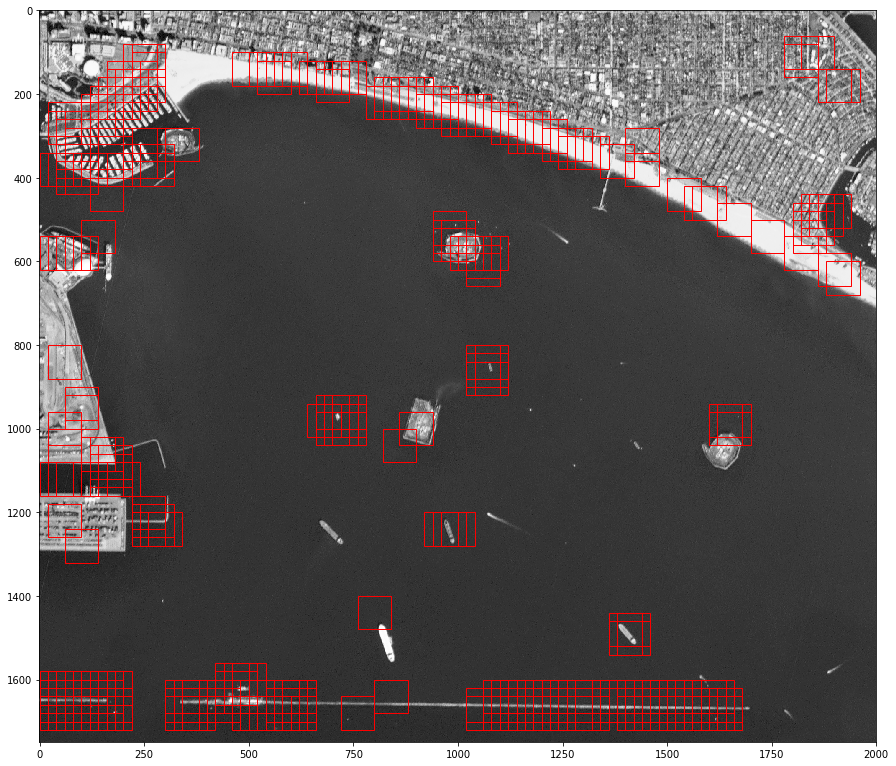

In [43]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(first_test, cmap='gray')
H, W = first_test.shape
for pos in xy:
    rect = patches.Rectangle((pos[1], pos[0]), 80, 80, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()